In [2]:
#By: Alexis Pacek
#Date: Octubre de 2021



#Importo las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
#importo el data set de las ventas de krostyburgers
df = pd.read_csv('Argetina-2019-anonimizado.csv', parse_dates = True) 

# Exploración inicial

###  ¿La tabla posee valores nulos?

In [4]:
string_vacio = df.applymap(lambda x: x == '').sum().sum() #Busco entradas con strings vacios ('')
nan_y_none = df.isnull().sum().sum() #Busco NaN's y None's
print('Hay %d valores nulos en la tabla.' % (string_vacio+nan_y_none)) #sumo los 3 tipos y los printeo

Hay 0 valores nulos en la tabla.


### ¿Cuántos locales posee la empresa?

In [5]:
"""
cuento la cantidad de elementos que hay en un array conformado por 
los id's de los locales sin repetir.
"""
total_locales = len(df['Local'].unique()) 

print('Hay' , total_locales, 'locales.') 


Hay 232 locales.


### ¿Cuántos tipos de locales hay? ¿Cuántos locales hay por cada tipo?

In [11]:
"""

De cada entrada tomo la información del tipo de local, luego me quedo con los elementos
que no se repiten. Printeo cuantos elementos no se repiten y cuales son ellos.

"""

cantidad_de_locales = len(df['Tipo_Local'].unique())

print('Hay', cantidad_de_locales,'tipos de locales.\n Ellos son:')

for i in df['Tipo_Local'].unique():
    print('-',i)


Hay 4 tipos de locales.
 Ellos son:
- IS
- FC
- FS
- MS


In [44]:
"""
Corroboro que cada local solo este clasificado como un único tipo de local.

"""

aux = []
for i in df.Local.unique():
    if len(df[df.Local==i]['Tipo_Local'].unique()) >=2:
        aux.append(len(df[df.Local==i]['Tipo_Local'].unique()))
        
print('Hay',len(aux),'entradas clasificadas como 2 tipos de locales (o más) al mismo tiempo.')    

Hay 0 entradas clasificadas como 2 tipos de locales (o más) al mismo tiempo.


In [45]:
"""
Como cada local solo esta caractizado como uno de los 4 tipos posibles.
Filtro todas las entradas en donde se repite el número de local y cuento 
cuantos locales hay de cada tipo. Printeo el valor absoluto y el valor relativo para cada uno de 
los 4 tipos.

"""

tipos_locales = df['Tipo_Local'].unique()
todos = df.drop_duplicates(['Local'])

for i in tipos_locales:

    cantidad = todos[todos.Tipo_Local==i].shape[0]
    print(cantidad,'locales son', i+'.', round((cantidad/total_locales)*100,2),'%')

81 locales son IS. 34.91 %
37 locales son FC. 15.95 %
65 locales son FS. 28.02 %
49 locales son MS. 21.12 %


### ¿Cuántas áreas hay? ¿Todos los locales tienen la misma cantidad de áreas? Graficar la distribución de la cantidad de áreas por local.

In [48]:
areas = df['Area'].unique()      #creo un array con las áreas posibles
cant_areas = len(areas)          #cuento cuantas areas hay
print('Hay',cant_areas,'áreas.') #printeo cant. de áreas


Hay 9 áreas.


In [49]:
#Exploro para 5 locales

j=0
for i in df['Local'].unique():
    print('Local número',i,'tiene',df[df.Local==i]['Area'].unique(),
          'áreas')
    j+=1
    if j==5:
        break

Local número 462 tiene [6 7 9] áreas
Local número 89869 tiene [5 6] áreas
Local número 89985 tiene [ 6 17  5] áreas
Local número 507 tiene [6 9 3] áreas
Local número 403 tiene [3 6] áreas


### Conclusión: distintos locales pueden tener distintas áreas.

In [96]:
"""
creo la variable "y" donde voy a appendear todas las áreas que hay para cada local

"""

y=[]
for i in df['Local'].unique():
    a = df[df.Local==i]['Area'].unique()
    for j in a:
        y.append(j)

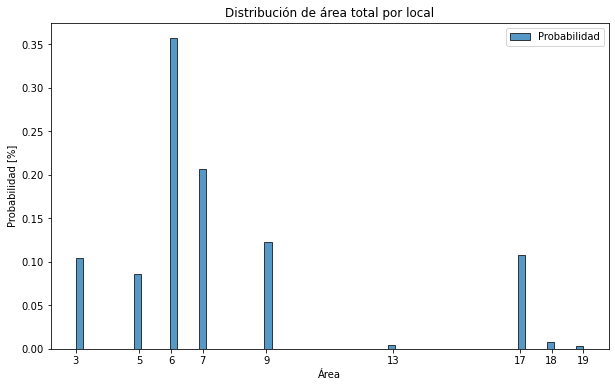

In [155]:
"""
Grafico el histograma normalizado.
"""

plt.figure(figsize=(10,6))
g = sns.histplot(y, stat='probability', label='Probabilidad')
g.set_xlabel('Área')
g.set_ylabel('Probabilidad [%]')
plt.xticks(areas)
plt.title("Distribución de área total por local");
plt.legend();


###  ¿Están correlacionadas la hora y la venta? Cuantificar esta correlación

In [151]:
x = np.sort(df['Hora'].unique())
total = []
for i in x:
    total.append(df.loc[df['Hora'] == i, 'Ventas'].mean())

In [160]:
df.loc[df['Hora']=='08:00 09:00', 'Ventas']

0          86
48          0
97          0
149         0
260         7
           ..
5170261     0
5170288    24
5170305    26
5170323     0
5170337    16
Name: Ventas, Length: 215462, dtype: int64

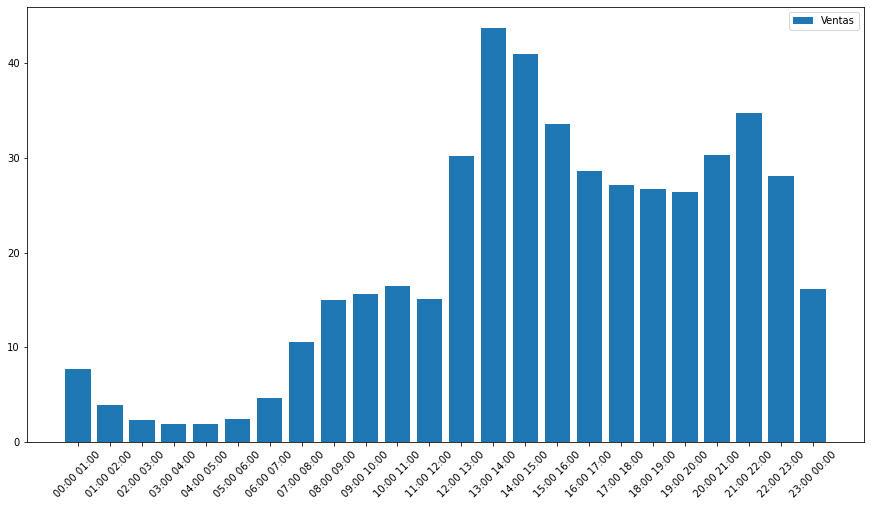

In [152]:
plt.figure(figsize=(15,8))
plt.bar(x,total, label='Ventas')
plt.xticks(rotation = 45);
plt.legend();


In [156]:
np.corrcoef(np.linspace(0.5,23.5,24),total)

array([[1.        , 0.75816191],
       [0.75816191, 1.        ]])

Entonces el coeficiente de correlación es 0.75 y nos indica que hay una correlación positiva osea que si aumenta la hora es posible que aumenten las ventas

# Exploración de un local particular

### Filtro el dataset y me quedo con el local 85262 y mes de junio

In [227]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
dff = df[df.Local==85262]

In [230]:
a = pd.DatetimeIndex(dff['Fecha']).month;

In [247]:
dff = dff.assign(Mes=a)

In [249]:
df1  = dff[dff.Mes==6]
df1

,Fecha,Hora,Local,Tipo_Local,Area,Ventas,Mes
4790,2019-06-17,13:00 14:00,85262,MS,17,119,6
5623,2019-06-04,16:00 17:00,85262,MS,6,27,6
12763,2019-06-24,07:00 08:00,85262,MS,17,0,6
15976,2019-06-14,04:00 05:00,85262,MS,9,0,6
20498,2019-06-23,21:00 22:00,85262,MS,6,184,6
...,...,...,...,...,...,...,...
4551261,2019-06-12,14:00 15:00,85262,MS,17,56,6
4552229,2019-06-27,21:00 22:00,85262,MS,17,72,6
4552911,2019-06-01,23:00 00:00,85262,MS,17,44,6
4553637,2019-06-11,23:00 00:00,85262,MS,7,17,6


### Calculo la correlación entre la hora y la venta

In [283]:
x = np.sort(dff['Hora'].unique())
total_ = []
for i in x:
    total_.append(dff.loc[dff['Hora'] == i, 'Ventas'].mean())

In [284]:
df1

,Fecha,Hora,Local,Tipo_Local,Area,Ventas,Mes
4790,2019-06-17,13:00 14:00,85262,MS,17,119,6
5623,2019-06-04,16:00 17:00,85262,MS,6,27,6
12763,2019-06-24,07:00 08:00,85262,MS,17,0,6
15976,2019-06-14,04:00 05:00,85262,MS,9,0,6
20498,2019-06-23,21:00 22:00,85262,MS,6,184,6
...,...,...,...,...,...,...,...
4551261,2019-06-12,14:00 15:00,85262,MS,17,56,6
4552229,2019-06-27,21:00 22:00,85262,MS,17,72,6
4552911,2019-06-01,23:00 00:00,85262,MS,17,44,6
4553637,2019-06-11,23:00 00:00,85262,MS,7,17,6


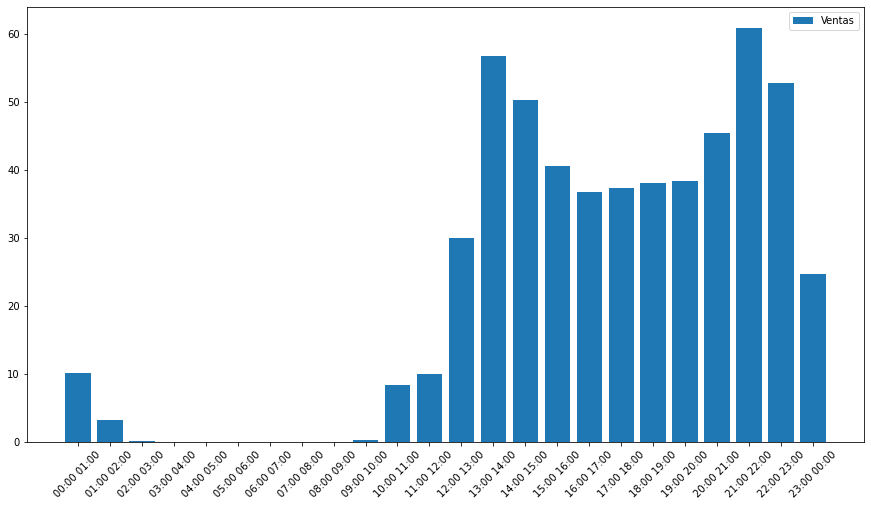

In [245]:
plt.figure(figsize=(15,8))
plt.bar(x,total_, label='Ventas')
plt.xticks(rotation = 45);
plt.legend();

In [246]:
np.corrcoef(np.linspace(0.5,23.5,24),total_)

array([[1.        , 0.81460822],
       [0.81460822, 1.        ]])

### Calcular la correlación entre la hora y la venta para cada área


In [297]:
area85 = np.sort(df1['Area'].unique())
area85

array([ 5,  6,  7,  9, 17], dtype=int64)

In [312]:
x = np.sort(df1['Hora'].unique())
for j in area85:    
    aux = df1[df1.Area==j]
    total_ = []
    for i in x:
        total_.append(aux.loc[df1['Hora'] == i, 'Ventas'].mean())
    print(np.corrcoef(np.linspace(0.5,23.5,24),total_), 'asociado a la área', j)    

[[1.         0.58156749]
 [0.58156749 1.        ]] asociado a la área 5
[[1.         0.73549702]
 [0.73549702 1.        ]] asociado a la área 6
[[1.         0.81303885]
 [0.81303885 1.        ]] asociado a la área 7
[[1.        0.6400023]
 [0.6400023 1.       ]] asociado a la área 9
[[1.         0.75947083]
 [0.75947083 1.        ]] asociado a la área 17
